# Logistics
Assignment 3 - Part 4

Name: Sayan Ray

Roll: 213230011

# Kernelized Principle Component Analysis.

---



# Importing The required packages.

In [59]:
# This are the standard packages imported
import numpy as np
import pandas as pd

# Imported for plotting and visualization
from matplotlib import pyplot as plt
import seaborn as sns

# FOr normalizing the dataset to a mean 0 and s.d. ±1
from sklearn.preprocessing import StandardScaler

# For performing Kernelized PCA
from sklearn.decomposition import KernelPCA


Learned the code I need to use to uplad DataClustering.csv from a local drive from https://www.geeksforgeeks.org/ways-to-import-csv-files-in-google-colab/

# Loading the dataset in a dataframe named 'PCA_train_df'.

In [60]:
KPCA_train_df = pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/DataKPCA.csv')

Displaying the dataset, with rows and columns info.

In [61]:
print (KPCA_train_df.shape)
print (KPCA_train_df)

(190, 7)
           x1         x2         x3         x4        x5        x6        x7
0    2.596641  15.263178 -46.289607 -10.993265 -2.266729  1.935832  2.039688
1    3.096286  14.784802 -48.175614  -8.799362 -2.220871  1.851201  1.921974
2    3.360246  14.774917 -49.471841  -9.030501 -1.760447  1.753114  2.041933
3    2.214819  15.027394 -43.200400 -13.565001 -2.643018  2.200463  2.141847
4    3.398576  15.115756 -49.416644  -6.857672 -2.025936  1.788085  1.875540
..        ...        ...        ...        ...       ...       ...       ...
185  2.647090  14.246231 -44.947807 -10.412540 -2.809695  2.084152  1.903990
186  2.677908  14.620351 -45.776334 -10.196029 -2.640178  2.038005  1.910832
187  3.543866  14.487241 -49.692284  -7.773038 -1.865513  1.752195  1.952922
188  3.563404  13.945495 -49.131439  -8.156546 -2.104684  1.773425  1.914397
189  3.718648  13.810806 -49.414929  -7.661211 -2.154060  1.773895  1.901090

[190 rows x 7 columns]


Conclusion: There are 190 rows of data with 7 features. With no target variable. 



---


# Exploaratory Data Analysis.


---



# Feature datatype check and check for missing values.  

In [62]:
# This part is inspired from Amit Sir's Lecuture on ML for Smart Monkeys
# I am checking for the unique values and features with missing entities

# c is just the counter of the features.
c = 1

for col in KPCA_train_df.columns.values:
  list_vals = pd.unique(KPCA_train_df[col])
  
  # So isnull() scans the missing values and then we sum it up.
  print(str(c) +". "+col + " is of type " + str(KPCA_train_df[col].dtypes) + " has " + str(len(list_vals)) + " unique values, and " + str(KPCA_train_df[col].isnull().sum(axis=0)) + " null entries")
  c = c + 1
  if len(list_vals) < 10:
    list_str=""
    for n_value in range (0,len(list_vals)):
      list_str = list_str + str(list_vals[n_value]) + ','
    print("These are: " + list_str[0:-1])

1. x1 is of type float64 has 190 unique values, and 0 null entries
2. x2 is of type float64 has 190 unique values, and 0 null entries
3. x3 is of type float64 has 190 unique values, and 0 null entries
4. x4 is of type float64 has 190 unique values, and 0 null entries
5. x5 is of type float64 has 190 unique values, and 0 null entries
6. x6 is of type float64 has 190 unique values, and 0 null entries
7. x7 is of type float64 has 190 unique values, and 0 null entries



# **Conclusion**: There are no null entries thus there is no need for removal or imputation of the dataset.

# Histograms of the features.

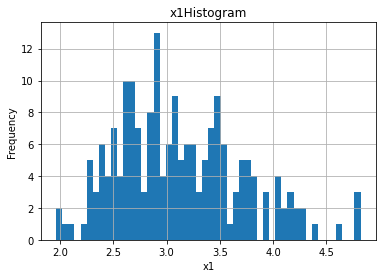

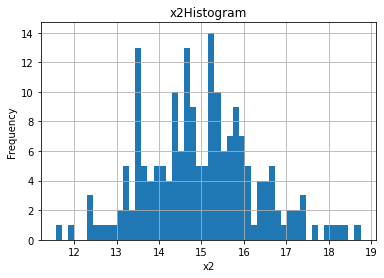

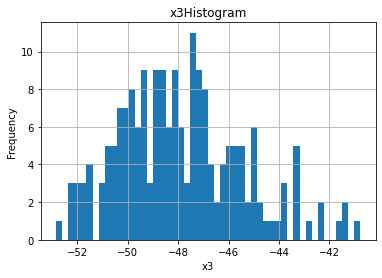

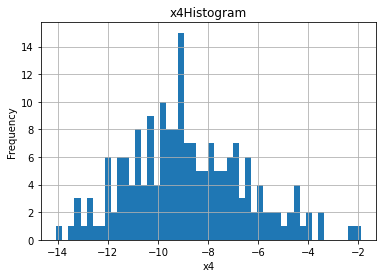

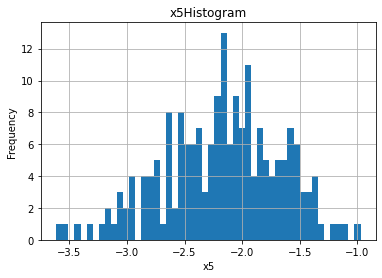

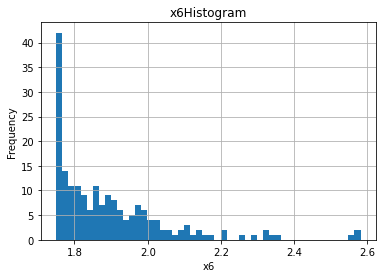

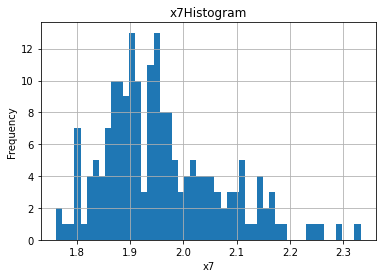

In [63]:
#To visualize the variables since all are continous we are creating histograms to understand their distribution
# So now taking all the features and checking their histograms

for feature in KPCA_train_df.columns.values:
    # I chose bin size 50 since it helped me visialize the shape easier.
    KPCA_train_df[feature].hist(bins=50)

    plt.xlabel(feature)
    plt.ylabel("Frequency")
    
    plt.title(feature + "Histogram")
    plt.show()
    print()

# **Conclusion**: x6 feature seems to be highly skewed, and the rest are slighly skewed and not exactly gaussian.

Also, their ranges vary and thus we need to Normalize to zero mean and unit s.d. before using the PCA function.

# Pearson Correlation Heatmap.

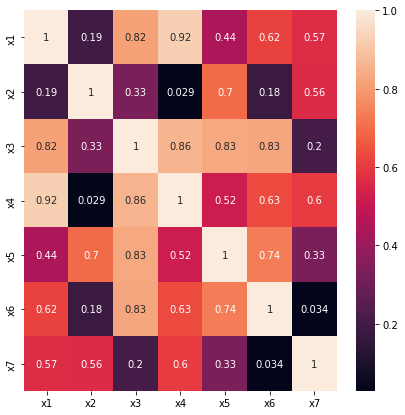

In [64]:
# So I'll be using the most commonly used correlation methon, Pearson's Correlation 
corr_pearson = KPCA_train_df.corr(method= 'pearson')

#Now making a heatmap out of it.
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(abs(corr_pearson), annot = True)
plt.show()

#**Conclusion**: From this Pearson correlation heatmap, we can see there does exist some an amount of correlation amongst the features. 
Evidently:

1. x1 has high correlation with x3, x4.
2. x3 has high correlation with x4, x5 and x6.
3. x5 has high correlation with x6.



# Now we need not know the nature of correlation, it will be removed during PCA .



---


# Training PCA on the dataset.


---



# Normalizing the data using standard scaler.

In [65]:
# Normalizing the dataset to a mean 0 and s.d. ±1
scaler = StandardScaler()
scaled_data = scaler.fit_transform(KPCA_train_df)



---


# Training PCA (3 RBF kernels with gamma : 0.001, 0.01, 0.1)

---



# I am keeping an array to store all the explained variances of the models so that I can compare them later.

In [66]:
overall_plot = []

# RBF Kernel (gamma = 0.001 )

In [67]:
# Setting up th KPCA function
kpca_rbf = KernelPCA(kernel='rbf',gamma=0.005)

# Transforming
kpca_rbf_data = kpca_rbf.fit_transform(scaled_data)
print (kpca_rbf_data.shape)

# Storing the explained variances
exp_var_rbf = np.var(kpca_rbf_data, axis=0)

# Converting them to percentages
exp_var_rbf_percentage = (exp_var_rbf * 100 )/ np.sum(exp_var_rbf)

(190, 172)


 Results

In [68]:
# A small precaution for plotting 
min_dim2 = min(kpca_rbf_data.shape[1],10)
dim = list(range(1,min_dim2+1))

c = 0
for d in dim:
  print ("Explained Variance for PCA dimension "+str(d)+" is  : "+str(exp_var_rbf_percentage[c])+" %")
  c+=1

overall_plot.append(exp_var_rbf_percentage[0:min_dim2])

Explained Variance for PCA dimension 1 is  : 53.58766670601172 %
Explained Variance for PCA dimension 2 is  : 30.59494885230951 %
Explained Variance for PCA dimension 3 is  : 7.778196528386278 %
Explained Variance for PCA dimension 4 is  : 4.192408810643227 %
Explained Variance for PCA dimension 5 is  : 1.154302955420627 %
Explained Variance for PCA dimension 6 is  : 0.9310642268648731 %
Explained Variance for PCA dimension 7 is  : 0.7424973362727629 %
Explained Variance for PCA dimension 8 is  : 0.39328812544057445 %
Explained Variance for PCA dimension 9 is  : 0.2062637901472143 %
Explained Variance for PCA dimension 10 is  : 0.13125998114215573 %


Plot

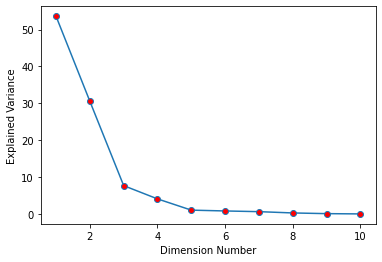

In [69]:
plt.plot(dim,exp_var_rbf_percentage[0:min_dim2],marker = 'o',markerfacecolor = 'red')
plt.xlabel('Dimension Number')
plt.ylabel('Explained Variance')
plt.show()

# RBF Kernel (gamma = 0.01)

In [70]:
# Setting up th KPCA function
kpca_rbf = KernelPCA(kernel='rbf',gamma=0.01)

# Transforming
kpca_rbf_data = kpca_rbf.fit_transform(scaled_data)
print (kpca_rbf_data.shape)

# Storing the explained variances
exp_var_rbf = np.var(kpca_rbf_data, axis=0)

# Converting thme to percentages
exp_var_rbf_percentage = (exp_var_rbf * 100 )/ np.sum(exp_var_rbf)

(190, 187)


Results

In [71]:
# A small precaution for plotting
min_dim2 = min(kpca_rbf_data.shape[1],10)
dim = list(range(1,min_dim2+1))

c = 0
for d in dim:
  print ("Explained Variance for PCA dimension "+str(d)+" is  : "+str(exp_var_rbf_percentage[c])+" %")
  c+=1

overall_plot.append(exp_var_rbf_percentage[0:min_dim2])

Explained Variance for PCA dimension 1 is  : 50.152572848924734 %
Explained Variance for PCA dimension 2 is  : 29.45402776750245 %
Explained Variance for PCA dimension 3 is  : 8.876807595835622 %
Explained Variance for PCA dimension 4 is  : 5.1100005667187895 %
Explained Variance for PCA dimension 5 is  : 1.8731635537280316 %
Explained Variance for PCA dimension 6 is  : 1.6088696595932177 %
Explained Variance for PCA dimension 7 is  : 0.994038252089959 %
Explained Variance for PCA dimension 8 is  : 0.7450273344750733 %
Explained Variance for PCA dimension 9 is  : 0.3110376551042327 %
Explained Variance for PCA dimension 10 is  : 0.21813011493379483 %


Plot

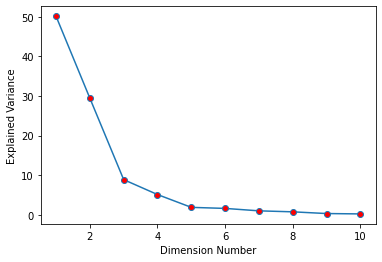

In [72]:
plt.plot(dim,exp_var_rbf_percentage[0:min_dim2],marker = 'o',markerfacecolor = 'red')
plt.xlabel('Dimension Number')
plt.ylabel('Explained Variance')
plt.show()

# RBF Kernel  (gamma = 0.1)

In [73]:
# Setting up th KPCA function
kpca_rbf = KernelPCA(kernel='rbf',gamma=0.1)

# Transforming
kpca_rbf_data = kpca_rbf.fit_transform(scaled_data)
print (kpca_rbf_data.shape)

# Storing the explained variances
exp_var_rbf = np.var(kpca_rbf_data, axis=0)

# Converting them to percentages
exp_var_rbf_percentage = (exp_var_rbf * 100 )/ np.sum(exp_var_rbf)

(190, 189)


Results

In [74]:
# A small precaution for plotting
min_dim2 = min(kpca_rbf_data.shape[1],10)
dim = list(range(1,min_dim2+1))

c = 0
for d in dim:
  print ("Explained Variance for PCA dimension "+str(d)+" is  : "+str(exp_var_rbf_percentage[c])+" %")
  c+=1

overall_plot.append(exp_var_rbf_percentage[0:min_dim2])  

Explained Variance for PCA dimension 1 is  : 25.86173732135202 %
Explained Variance for PCA dimension 2 is  : 18.20006011865106 %
Explained Variance for PCA dimension 3 is  : 15.182606943005153 %
Explained Variance for PCA dimension 4 is  : 6.6221870264149105 %
Explained Variance for PCA dimension 5 is  : 6.135238768245638 %
Explained Variance for PCA dimension 6 is  : 5.040395679298114 %
Explained Variance for PCA dimension 7 is  : 4.050841549455405 %
Explained Variance for PCA dimension 8 is  : 2.5953851227490565 %
Explained Variance for PCA dimension 9 is  : 1.9180644658304769 %
Explained Variance for PCA dimension 10 is  : 1.8702513879286036 %


Plot:

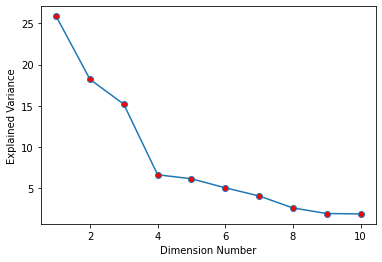

In [75]:
plt.plot(dim,exp_var_rbf_percentage[0:min_dim2],marker = 'o',markerfacecolor = 'red')
plt.xlabel('Dimension Number')
plt.ylabel('Explained Variance')
plt.show()

# Conclusion : The explained variance is more in first few dimensions for smaller values of gamma, as we increase its value more dimensions come into prominence.


Comparison plot

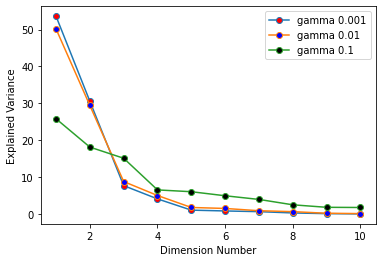

In [76]:
plt.plot(dim,overall_plot[0],marker = 'o',markerfacecolor = 'red', label = 'gamma 0.001')
plt.plot(dim,overall_plot[1],marker = 'o',markerfacecolor = 'blue', label = 'gamma 0.01')
plt.plot(dim,overall_plot[2],marker = 'o',markerfacecolor = 'black', label = 'gamma 0.1')
plt.xlabel('Dimension Number')
plt.ylabel('Explained Variance')
plt.legend(loc="upper right")
plt.show()